In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
kunak = pd.read_csv('kunak_filled.csv', parse_dates=[0], index_col=0)
wind = pd.read_csv('wind.csv', parse_dates=[0], index_col=0)

In [3]:
df = pd.concat([kunak, wind],axis=1, join='inner')
df

,Dew Point (C),H2S (ppb),NO2 (ppb),Humidity (%),O3 (ppb),PM1 (ug/m3),PM2.5 (ug/m3),PM10 (ug/m3),Temp (C),windspeed,direction
2022-05-13 12:00:00,11.56,1.14,34.93,4.54,39.70,9.15,10.55,14.87,28.57,1.46,68.00
2022-05-13 13:00:00,12.77,2.72,36.15,3.82,51.90,7.78,8.97,12.94,29.34,2.98,72.62
2022-05-13 14:00:00,12.20,3.20,34.29,3.59,52.35,5.68,6.60,10.07,29.66,5.81,71.18
2022-05-13 15:00:00,9.27,0.06,28.25,0.77,56.88,4.80,5.75,10.22,29.59,6.98,57.97
2022-05-13 16:00:00,9.24,0.31,27.71,1.52,61.56,4.71,5.58,9.32,29.88,6.23,56.73
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-29 03:00:00,19.24,35.03,58.13,28.24,33.65,11.76,12.59,15.02,28.32,0.95,188.67
2022-07-29 04:00:00,18.63,19.50,58.13,19.23,32.66,10.85,11.61,13.61,27.61,0.69,264.97
2022-07-29 05:00:00,17.57,8.13,55.88,20.95,28.04,9.09,9.94,12.00,27.14,0.42,276.30
2022-07-29 06:00:00,17.47,7.51,56.61,31.34,19.79,8.19,9.22,12.03,26.82,0.73,258.35


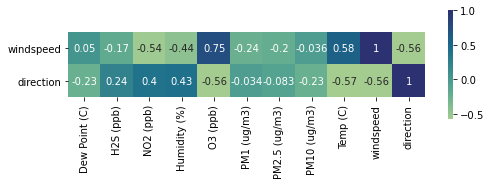

In [4]:
plt.figure(figsize=(8,2))
sns.heatmap(df.corr()[['windspeed','direction']].T,cmap='crest', annot=True, square=True)
plt.show()

#### Δεν υφίσταται συσχέτιση κατεύθυνσης σε μοίρες.

In [5]:
bins = bins = np.linspace(0,360,9)+22.5
bins = np.insert(bins,0,0)
labels = ["N","NE","E","SE","S","SW","W","NW","N2"]

In [6]:
df['wind direction'] = pd.cut(df.direction, bins=bins, labels=labels, include_lowest=True)
df['wind direction'] = df['wind direction'].replace('N2','N')
df.head()

,Dew Point (C),H2S (ppb),NO2 (ppb),Humidity (%),O3 (ppb),PM1 (ug/m3),PM2.5 (ug/m3),PM10 (ug/m3),Temp (C),windspeed,direction,wind direction
2022-05-13 12:00:00,11.56,1.14,34.93,4.54,39.70,9.15,10.55,14.87,28.57,1.46,68.00,E
2022-05-13 13:00:00,12.77,2.72,36.15,3.82,51.90,7.78,8.97,12.94,29.34,2.98,72.62,E
2022-05-13 14:00:00,12.20,3.20,34.29,3.59,52.35,5.68,6.60,10.07,29.66,5.81,71.18,E
2022-05-13 15:00:00,9.27,0.06,28.25,0.77,56.88,4.80,5.75,10.22,29.59,6.98,57.97,NE
2022-05-13 16:00:00,9.24,0.31,27.71,1.52,61.56,4.71,5.58,9.32,29.88,6.23,56.73,NE


In [7]:
df['wind direction']=df['wind direction'].astype('string')
df.loc[df['windspeed']<0.5,'wind direction'] = 'CALM'

In [8]:
df.to_csv('kunak_wind.csv')